In [ ]:
"""The code is divided in two different part:
1) Computation of Betti-0 with an extremely precise algorithm.
   Example of Application
   Visualisation of data.

2) Computation of Betti-k (also higher order Betti) with an algorithm conceptually different from the previous one.
   Computation of Euler characteristic using two different methods.
   Examples of application of the methods 
   Visualisation of the data
"""


""" 1) Computation of Betti-0 curves"""

"""Starting from connectivity matrix CX using an algorith we create the Dx matrices. 
In the Dx matrices all the information of the different clusters are stored.
The Betti-0 curves (# connected components vs filtration value) created with the following code are very precise, 
all the filtration value in the matrix are taken into account"
We also illustrate how to visualize the Betti-0 curves to see how the connencted components are merging with the increasment
of the filtration value and we plot the results.
"""

"""
__author__ = "Giulia Moreni"
__contact__ = "giulia.moreni1995@gmail.com"
__date__ = "2020/04/15"   ### Date it was created
__status__ = "Concluded" ### 


####################
 Review History   #
####################

Reviewed by Name Date ### 

Fernando 03/11/2020
"""

In [1]:
####################
# Libraries        #
####################
import pandas as pd #
import matplotlib.pyplot as plt #
import numpy as np # version 1.0.1
import scipy as sio #
import glob #
import seaborn as sns #

In [2]:
def from_cx_to_dx(matrix,verbose=False):
    """Function to convert a matrix Cx to a Dx matrix (definition of distance between points based on clusters, not euclidean distance)
    
    Parameters
    ----------
    Argument1: Matrix NxN array type (i.e., the connectivity matrix you want to convert into Dx matrix - Notice that in the Dx matrix the info of the barcodes are also stored) 

    
    Returns
    -------
    out: Dx matrix (NxN), 
    a_values (list which contains the filtration values where a change in the clustering of the network occurs),
    connected_comp (list containing the number of connected components at each filtration step)
        
    """
    
    a_values=[] # initialize the array of the filtration values 
    connected_comp=[] #initialise the array that will contain the number of connected components (from 100 different components to 1 giant component) ### This can be any size actually?
    list_clusters = [[i] for i in range(0,len(matrix)) ] #initialize the array which contains the lists of clusters(connected components). 
                                                        #In each list I have the points which are part of the same cluster.
                                                        #At first I have 100 connected components (100 separetad lists), at the end I will have 1 big list containg all the points (1 giant component)
   
    connected_comp.append(len(list_clusters)) # Appending the number of different cluster I have at the beginnig
    if verbose==True:
        print(list_clusters)
    a=0 #order of the cluster
    a_values.append(a) # Appending the first filtration value to the list of filtration values
    
    while (find_max(matrix) >= a ): #until all the numbers in the matrix are substituted with the order of the 
        
        if verbose==True: #if verbose == True: you can make all the checks you need on the algorithm
            print("a:",a) 
            print("I look for the position of a")
            
        array_positions = find_pos_a(a,matrix) # looking for the positons where we have a connection of order a (see function below)
        
        if verbose==True:
            print("array_position:",array_positions)
        
        for position in array_positions :

            index_x= find_index(list_clusters,position[0])# In the list list_clusters(which contain the lists of clusters) I look for the index of the array which contain that point(position[0])
            #print("index_x:",index_x)
            
            index_y=find_index(list_clusters,position[1]) # In the list list_clusters(which contain the lists of clusters) I look for the index of the array which contain that point(position[1])
            #print("index_y:",index_y)
            
            if index_y != index_x: #Beacause if so they already are in the same cluster so I don't need to merge the two clusters
                 
                #Since position[0] and position[1] are connected with connection of order a (I looked for it with find_pos) I then looked in which cluster they belong to and now I can connect all the points in the two clusters with the same order of connection (definition of dx)
                for row in list_clusters[index_x]: # I go in the cluster where the point of position[0] is contained and for each point there I create a connection with the points in the cluster where position[1] is contained (I set matrix[row][colum]=a) 
                    for column in list_clusters[index_y]:

                        matrix[row][column]=a 
                        matrix[column][row]=a
                        if verbose==True:
                            print("matrix[%d,%d]=%d"%(row,column,a))
                            print("matrix[%d,%d]=%d"%(column,row,a))
                
                if verbose==True:
                    print(matrix)
                    print("update array cluster")
                list_clusters[index_x].extend(list_clusters[index_y]) # Now I am merging the two clusters 
                list_clusters.remove(list_clusters[index_y]) # I can remove the old cluster 
                
                if verbose==True:
                    print("list_clusters updated",list_clusters)

                connected_comp.append(len(list_clusters)) # I append the number of connected components I now have
                a_values.append(a) #I append the filtration value I was using
        a= find_min(a,matrix) # I update the filtration value and I start again the loop
        
    if verbose==True:   
        print(a_values)
        print(connected_comp)
        print(matrix)
        
    return matrix,a_values,connected_comp

#This Function is needed for the previous function
#Function to find the maximum value of the matrix        
def find_max(matrix):
    """Function to find the maximum value of the matrix
    Parameters
    ----------
    Argument1: Matrix NxN array type
    
    Returns
    -------
    out: value of the maximum
    """
    c=0
    for i in range(len(matrix)):
        for j in range(i,len(matrix)):
            if matrix[i][j] > c:
                c= matrix[i][j]        
    return c
        
        
#This Function saves the position where we have a connenction of the order of a         
def find_pos_a(a,matrix):
    """Function to find the nodes connected with value a 
    Parameters
    ----------
    Argument1: value in the matrix we want to check
    Argument2: Matrix NxN array type
    
    Returns
    -------
    out: list containing the index of the couples of nodes connected with value a
    """
    positions=[] #Initialize the list of positions
    
    for i in range(len(matrix)): #I look for the connection of order a (I can check just half of the matrix since it is simmetric)
        for j in range(i+1,len(matrix)):
            
            if matrix[i][j]==a: # if the connection betwwen i and j is equal to a 
                pos = [i,j] #saving the two points ("position in the matrix")
                positions.append(pos) #appending the position to the array positions
    return positions         
 
    
# I look for the index of the list (in the lists of arrays) which contain a particular value
def find_index(list_arrays,value):
    """Function to find the index of the list containing a particular value
    Parameters
    ----------
    Argument1: list
    Argument2: value (we want the index of that value in the list)
    
    Returns
    -------
    out: index in the list which contain the desired value
    """
    for i in range(len(list_arrays)):
        for j in range(len(list_arrays[i])):
            if list_arrays[i][j]==value:
                return i    

#finding the new filtration value, I look for the minimum value in the matrix but greater than the previous a 
def find_min(a,matrix):
    """Function to find the minimum value in the matrix greater than a given value
    Parameters
    ----------
    Argument1: value in the matrix
    Argument2: Matrix NxN array type
    
    Returns
    -------
    out: minimum value in the matrix greater than a 
    """
    b=100
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] < b and matrix[i][j] > a :
                b= matrix[i][j]
                
    return b

In [ ]:
####################################
# Example where we use the previous function to generate the Dx matrix from the Cx matrix       #
####################################

########
#Code to create a big object with all the Cx matices 
txt_files_cx = glob.glob('Cx_matrix_var01/cx*.txt') #opening the Cx of the 10 types which are in the folder "Cx_matrix_var01"
print(txt_files_cx)
Cx_list = [] #Object that will contain all the Cx matrices

for i in range(0,len(txt_files_cx)): #Reading the data in the files and create an object which contains every matrix
    file_i= txt_files_cx[i]
    Cx_list.append(np.array(np.loadtxt(file_i)))   #Add the matrix of a file to the object Cx_list

Cx=np.array(Cx_list)  #Converting the list with all the matrix in a big numpy array
########


#######
#Calling the function one time for the first Cx matrix
dx,a,conn=from_cx_to_dx(Cx[0])
print(dx)
#Visualisation of the BETTi-0 curve
fig=plt.figure(figsize=(15, 10))
plt.plot(a,conn, marker='.') # I plot the two arrays         
plt.title("Connected components vs filtration value",fontsize=18)
plt.xlabel("filtration value",fontsize=15)
plt.ylabel("# connected components",fontsize=15)
#######


#########
#Calling the function several times
########
#IMPORTANT: TO RUN THIS you need to create an empty folder "Dx_matrix_var01"
# if you also want the Betti curves you need to create an empty folder "Beta_var01"

#Code to create the Dx matrices from the Cx matrices and the lists of filtration values and connected components for each matrix
for k in range(0,len(Cx)):

    dx,a,conn=from_cx_to_dx(Cx[k]) # I call the function to create the dx matrix from the cx matrix
    #print(a)
    #print(conn)
    print("Matrix dx %d created"%k)
      
    g=txt_files_cx[k] # g is the file cx
    g=g.replace('Cx_matrix_var01\\cx','Dx_matrix_var01\\dx')  #I replace the name cx with dx in the file name (and I change folder) 
    #N.B Depending on the operating system the name of the file could be \\ or / check which one you should use (you see it when you printed txt_files_cx).
    f=open(g,'w+') #I open the file in the new folder and I save the dx matrix
    
    for i in range(0,len(dx)):
        for j in range(0,len(dx)):
            f.write('%f ' %dx[i][j]) # I write the matrix dx on the file
        f.write('\n')
    f.close()
    
    # I can comment this part if I don't want to create the barcode
    #TO SAVE BETTI
    l=txt_files_cx[k]
    l=l.replace('cx','betti')
    l=l.replace('Cx_matrix_var01\\','Beta_var01\\')
    f=open(l,'w+')
    for i in range(len(a)): 
        f.write('%f %f' %(a[i],conn[i])) # I write in the file the two lists 
        f.write('\n')
    f.close()

In [3]:
####################
# Visualisation of the Betti-0 curves#
####################


#Code to visualize the Barcode: merging of connencting components with the increment of the filtration value
import matplotlib.patches as mpatches
fig=plt.figure(figsize=(15, 10)) # I create the figure
filtr_value=[] # list which contain all the lists of filtration values
betti_n=[] #list which contain all the lists of connected components

filtr_value2=[]
betti_n2=[]
labels=['C%i'%(i+1) for i in range(0,10)]
colors=['darkred','red', 'darkorange','gold', 'lawngreen','green', 'limegreen','turquoise','steelblue','darkblue'] #colors
for i in range(0,10): #For all the 10 files of beta_zero I have (If I have N patients the loop will be in the range(0,N) )
        
        betti_data  = pd.read_csv('Beta_var01/betti_i=%s_n=000.txt'%str(i+1).zfill(3), delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
        filtr_value.append(np.array(betti_data['x'])) # Create an array containing the values of x in the file and append it to filt_value list
        betti_n.append(np.array(betti_data['y'])) # Create an array containing the values of y in the file and append it to betti_n list
        plt.plot(filtr_value[i],betti_n[i], marker='.',label=labels[i], c=colors[i]) # I plot the two arrays 

        
        plt.title("Connected components vs filtration value",fontsize=18)
        plt.xlabel("filtration value",fontsize=15)
        plt.ylabel("# connected components",fontsize=15)
        plt.legend(fontsize=18)
        
#fig.savefig('Beta_var01/Betti_exp2.png') #Save figure
plt.show()

ValueError: Names should be an ordered collection.

<Figure size 1080x720 with 0 Axes>

In [ ]:
#Plot all the Dx matrix for the different configuration of points (just for the first experiment of each n=000)
for i in range(0,10):
    dx=np.array(np.loadtxt('Dx_matrix_var01/dx_i=%s_n=000.txt'%(str(i+1).zfill(3))) ) #load the file dx in an array
    
    fig = plt.figure(figsize=(15, 10)) #create the figure
    Dx_plot = sns.heatmap(dx,square=True,cmap='hot',xticklabels=10,yticklabels=10) #plot the figure using heatmap
    Dx_plot.set(xlim=(0,100),ylim=(100,0)) #set the x and y range
    plt.title('Dx i=%s'%(str(i+1)),fontsize=25) #set the title
    plt.tick_params(axis='both', labelsize=25)
    #fig.savefig('Dx_figures_var01/Dx i=%s.png'%(str(i+1))) #save the figure in the folder 

In [ ]:
""" 2) Computation of Betti numbers and Euler characteristic in a network"""

"""Also with this code we can compute Betti-0 but in a less precise way compared to the previous code, here we are not looking at ALL filtration values but slices.
Here we compute not just Betti-0, with the following code we can compute Betti-1,Betti-2....Betti-n and the Euler characteristic.
B_0 is the number of connected components
B_1 is the number of 2D holes
B_2 is the number of 3D holes 
B_3 is the number of 4D holes
Euler characterisitc : alternative sum of the number of k-simplex
We compute the Euler characteristic in two different ways: 
-with an exact computation (taking into account all k-simplex)
-with an approximation (fixing the maximum dimension of the k-simplex we want to consider).
"""
"""
__author__ = "Giulia Moreni"
__contact__ = "giulia.moreni1995@gmail.com"
__date__ = "2020/05/15"   ### 
__status__ = "Concluded" ### 

####################
Review History   #
####################

Reviewed by Name Date ### 

"""

In [1]:
####################
# Libraries        #
####################
import itertools
import numpy as np
import networkx as nx
from scipy.sparse import lil_matrix
import matplotlib as plt
import time
import glob
import scipy as sio 

In [2]:
#######################
#Function to compute the Euler Caracteristic
def euler(G, verbose = False):
    """#Function to compute the Euler characteristic of a network 

    Parameters
    ----------
    Argument1: G is a network. It is in the shape of a network graph of the library networkx G.graph()
    
    Returns
    -------
    out: value of the Euler characteristic of that network
    
    obs: if verbose = True, it will print all the steps of the calculation, so that one can check whether the code is working well. Otherwise, if verbose=False, only the output will be returned

   """
    def DIAGNOSTIC(*params): # If verbose is True it will print all the DIAGNOSTIC
        if verbose: 
            print(*params)

    DIAGNOSTIC("Nodes in G: ", G.nodes())    
    DIAGNOSTIC("Edges in G: ", G.edges())
    DIAGNOSTIC("Number of nodes: {}, edges: {}".format(G.number_of_nodes(), G.number_of_edges()))
    
    # 1. Prepare maximal cliques
    
    C = nx.find_cliques(G) # C now is the operator "find clique" (to do the list I should do list(nx.find_cliques(G)) )
        
    #Create list C with all the cliques
    #Sort each clique, convert it from list to tuple
    C = [tuple(sorted(c)) for c in C]
    DIAGNOSTIC("List with all maximal simplex C:",C)
    
    DIAGNOSTIC("Number of maximal cliques: %i"%(len(C)))
    

   
    # 2. Enumerate all simplices
    
    S = [] #List of dictionaries
    # S[k] is the dictionary which contain all k-simplices
    #S[k].keys() are simplex s (s is one of the k-simplex of the dictionary S[k])
    # S[k].values() are the ID of simplex s
    DIAGNOSTIC("I start the loop where I create for each k the Sk list with all the k-simplex")
    n=max(len(c) for c in C)
    for k in range(0, n) :
        
        # Get all (k+1)-cliques, i.e. k-simplices, from max cliques mc
        
        Sk = sorted(set(c for mc in C for c in itertools.combinations(mc, k+1)))#Sk=[] 
                                                                        #for mc in C:
                                                                            #for c in itertools.combinations(mc, k+1):
                                                                                #Sk.append(c)
       
        DIAGNOSTIC("list of %i-simplex S%i:"%(k,k), Sk)
        # Check that each simplex is in increasing order
        assert(all((list(s) == sorted(s)) for s in Sk))
        # Assign an ID to each simplex, in lexicographic order
        S.append(dict(zip(Sk, range(0, len(Sk))))) # zip(Sk,range()) is an object (composed by tuples) where each element of Sk is associated to a number.
                                                    # I then from the zip object create the dictionary where the key is the Sk element and the value the number
                                                    #I put this dictionary in the S list (list of dictionary) 
        
    for (k, Sk) in enumerate(S):
        DIAGNOSTIC("Number of {}-simplices: {}".format(k, len(Sk)))
    
    DIAGNOSTIC("S dictionary",S)  
    
    # The cliques are redundant now
    del C

    # Euler characteristic
    ec = sum(((-1)**k * len(S[k])) for k in range(0, len(S))) #Alternate sum of all the quantity of simplex of different dimension we have
                                                              #len(S[k]) is how many k-simplex we have
                                                              # I sum for every k we have, len(S) is the maximum k we can find (dimension of the simplex)
    DIAGNOSTIC("Euler characteristic:", ec)
    return ec

In [4]:
#################
def euler_k(G,kmax, verbose= False): #THIS ONE HAS THE K_MAX!!!!! We make an assumption on the maximum size of the cliques!
    """#Function to compute the Euler characteristic of a network with the constraint that we look for cliques up to max dimension k

    Parameters
    ----------
    Argument1: G is a network. It is in the shape of a network graph of the library networkx G.graph()
    Argument2: maximum dimension of clique I consider
    
    Returns
    -------
    out: "S"=EC, tau, kmax, clique_0,Clique_1,Clique_2, Clique_3, and so on... is a list!
            S[0]= value of the Euler characteristic of that network

   """   
    # 1. Prepare maximal cliques
    
    
    #main()
    Nodes=len(G)
    
    Cliques = nx.find_cliques(G)
    
    def max_cliques(N,k):
        # This function computes the max number for cliques that exists for a given size
        mclq=0
        for i in range(0,k):
            mclq+=sio.special.binom(N,k)

        return int(mclq)
    
    Limit=max_cliques(Nodes,kmax)+100 #maximum number of cliques that you want to find 
    if verbose==True:
        print("Limit:",Limit)
    Cl=[]
    while True:
        try:
            for i in range(0,Limit):
                clq=next(Cliques)
                if len(clq)<=kmax: # IF YOU DON'T WANNA USE KMAX JUST COMMENT THIS STEP TO MAKE IT QUICKER
                    Cl.append(clq)
        except StopIteration:
            break
    
    
    # Sort each clique, make sure it's a tuple
    C = [tuple(sorted(c)) for c in Cl]
    if verbose== True:
        print("C:",Cl)
    
    S= [] #Contain the number of clique of each order k  
    for k in range(0, max(len(s) for s in C)) :
        # Get all (k+1)-cliques, i.e. k-simplices, from max cliques mc
        Sk = set(c for mc in C for c in itertools.combinations(mc, k+1))
        S.append(len(Sk))
    #print("S:",S)
    tau=sum(S) # Tau gives the total number of cliques
    kmax=len(S) # Kmax is the maximum clique size one can find
    
    if verbose== True:
        print("total # of cliques:",tau)
        print("maximum clique size we can find:",kmax)
    
    Ec=0 # Ec is the Euler characteristics             
    Ec = sum(((-1)**i * S[i]) for i in range(0, len(S)))
    if verbose== True:
        print("The Euler characteristic EC is:",Ec)    
   

    #print((k))
    S.insert(0,kmax)
    S.insert(0,tau)
    S.insert(0,Ec)
    if verbose== True:
        print("S:Euler,total cliques, maximum dimension of clique, number of clique_0,Clique_1,Clique_2, Clique_3")
        print("S:",S)
    for i in range(kmax,30): # I want to include new elements after kmax with zero, to say that there are no simplicies with this size
        S.insert(kmax+3,0) # The first value is Euler, the second is tau, the third is kmax
    # The output will be EC, tau, kmax, clique_0,Clique_1,Clique_2, Clique_3, and so on...
    return S

Nodes in G:  [1, 4, 2, 3, 5, 6]
Edges in G:  [(1, 4), (1, 2), (1, 5), (1, 6), (4, 3), (4, 5), (4, 6), (2, 3), (2, 5), (2, 6), (3, 5), (3, 6)]
Number of nodes: 6, edges: 12
List with all maximal simplex C: [(1, 2, 5), (1, 2, 6), (1, 4, 5), (1, 4, 6), (2, 3, 5), (2, 3, 6), (3, 4, 5), (3, 4, 6)]
Number of maximal cliques: 8
I start the loop where I create for each k the Sk list with all the k-simplex
list of 0-simplex S0: [(1,), (2,), (3,), (4,), (5,), (6,)]
list of 1-simplex S1: [(1, 2), (1, 4), (1, 5), (1, 6), (2, 3), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6)]
list of 2-simplex S2: [(1, 2, 5), (1, 2, 6), (1, 4, 5), (1, 4, 6), (2, 3, 5), (2, 3, 6), (3, 4, 5), (3, 4, 6)]
Number of 0-simplices: 6
Number of 1-simplices: 12
Number of 2-simplices: 8
S dictionary [{(1,): 0, (2,): 1, (3,): 2, (4,): 3, (5,): 4, (6,): 5}, {(1, 2): 0, (1, 4): 1, (1, 5): 2, (1, 6): 3, (2, 3): 4, (2, 5): 5, (2, 6): 6, (3, 4): 7, (3, 5): 8, (3, 6): 9, (4, 5): 10, (4, 6): 11}, {(1, 2, 5): 0, (1, 2, 6): 1,

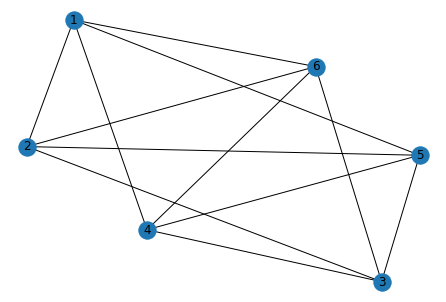

In [5]:
###################################################
#EXAMPLE OF APPLICATION OF THE TWO EULER FUNCTIONS#
###################################################
G = nx.Graph()
G.add_edges_from([ (1, 4), (1, 2), (2, 3), (3, 4),(5,4),(5,3),(5,2),(5,1)])
G.add_edges_from([(6, 4), (6, 3), (6, 2), (6, 1)])
nx.draw(G,with_labels = True)

E=euler(G,verbose=True)
print("Euler value using Euler function:",E)
print("#################### second method ########################" )
S=euler_k(G,4,verbose=True)
print("Euler value (using maximum clique size of 4, i.e., k_max = 4):", S[0])

In [6]:
#############################
#Function to compute the required betti number
#To call the function insert the Network G and the required betti K_input
#B_0 is the number of connected components
#B_1 is the number of holes
#B_2 is the number of holes 2 tetraedrs one under the other
#B_3 is the complex structure 
def Betti_k(G,K_input,verbose=False):
    """#Function to compute the desired Betti number of a network 

    Parameters
    ----------
    Argument1: G is a network. It is in the shape of a network graph of the library networkx G.graph()
    Argument2: K_input--> insert 1 if you want to compute Betti-1, 2 for Betti-2 etc.
    
    Returns
    -------
    out: value of the desired Betti number.

    """
    def DIAGNOSTIC(*params): # If verbose is True it will print all the DIAGNOSTIC
        if verbose: 
            print(*params)

    DIAGNOSTIC("Nodes in G: ", G.nodes())    
    DIAGNOSTIC("Edges in G: ", G.edges())
    DIAGNOSTIC("Number of nodes: {}, edges: {}".format(G.number_of_nodes(), G.number_of_edges()))
    
    # 1. Prepare maximal cliques
    
    # compute maximal cliques
     
    C = nx.find_cliques(G) # C now is the operator "find clique" (to do the list I should do list(nx.find_cliques(G)) )
    
    #Create list C with all the cliques
    #Sort each clique, convert it from list to tuple
    C = [tuple(sorted(c)) for c in C]
    DIAGNOSTIC("List with all maximal simplex C:",C)    
    DIAGNOSTIC("Number of maximal cliques: %i"%(len(C)))    
   
    # 2. Enumerate all simplices
    
    S = [] #List of dictionaries
    # S[k] is the dictionary which contain all k-simplices
    #S[k].keys() are simplex s (s is one of the k-simplex of the dictionary S[k])
    # S[k].values() are the ID of simplex s
    DIAGNOSTIC("I start the loop where I create the required Sk to then compute betti. Sk is a list with the k-simplex")
    #I set the range for the following loop
    if K_input==0:
        ini=0
        fin=2
    else:
        ini=K_input-1
        fin=K_input+2
        
    for k in range(ini,fin) : # k has 2 values for betti_0 and 3 values for betti1_2_3 
        
        Sk = sorted(set(c for mc in C for c in itertools.combinations(mc, k+1)))#Sk=[] 
                                                                        #for mc in C:
                                                                            #for c in itertools.combinations(mc, k+1):
                                                                                #Sk.append(c)
       
        DIAGNOSTIC("list of %i-simplex S%i:"%(k,k), Sk)        
        # Check that each simplex is in increasing order
        assert(all((list(s) == sorted(s)) for s in Sk))        
        # Assign an ID to each simplex, in order
        S.append(dict(zip(Sk, range(0, len(Sk))))) # zip(Sk,range()) is an object (composed by tuples) where each element of Sk is associated to a number.
                                                    # I then from the zip object create the dictionary where the key is the Sk element and the value the number
                                                    #I put this dictionary in the S list (list of dictionary)   
        DIAGNOSTIC("Number of %i-simplices: "%(k),len(Sk))    
    DIAGNOSTIC("S dictionary",S)      
    #The cliques are redundant now
    del C
    
    # 3. Construct the boundary operator
    
    #Boundary Matrix 
    D =[None, None] #List with the two different k-boundary operators
    
    if K_input==0:
        # D[0] is the zero matrix
        D[0]=(np.zeros((1, G.number_of_nodes())))#I create a matrix of size (1,#nodes)
        
    for k in range(1, len(S)):
        
        #I set the index of D[] and the number of nodes in each group for the combinatory part
        if K_input==0:
            index=k
            b=k
        else:
            index=k-1
            b=k+(K_input-1)
            
        D[index] = np.zeros( (len(S[k-1]), len(S[k])) ) #I create a matrix of size (len(S[k-1]), len(S[k])

        for (ks, j) in S[k].items() :
            
            a=sorted(itertools.combinations(ks, b))
            #print("a",a)
            # Indices of all (k-1)-subsimplices s of the k-simplex ks
            I = [S[k-1][s] for s in sorted(itertools.combinations(ks, b))] #S is a list of dictionary with k different size with the di
            #print("I",I)

            for i in range(0,len(I)):
                D[index][I[i]][j] = (-1)**(i)

        if D[index].shape[1]==0:
            DIAGNOSTIC("I can't create matrix D because I don't have the needed k-simplex")
        
        DIAGNOSTIC("Boundary matrix:")
        DIAGNOSTIC("D",D[index])
            
    DIAGNOSTIC("D_{} has shape {}".format(K_input, D[0].shape))
    DIAGNOSTIC("D_{} has shape {}".format(K_input+1, D[1].shape))
    # The simplices are redundant now
    del S
    
    # 4. Compute rank and dimker of the boundary operators
    
    # dim(Im)=Rank and dim(ker)=V-rank
    rank = [0 if d.shape[1]==0 else np.linalg.matrix_rank(d) for d in D] #dim(Im)
    ker = [(d.shape[1] - rank[n]) for (n, d) in enumerate(D)] #V - rank = dim(ker) ,rank=dim(Im)
    
    #The boundary operators are redundant now
    del D
    DIAGNOSTIC("ker:", ker)
    DIAGNOSTIC("rank:", rank)
    
    # 5. Compute the Betti number   
    
    # Betti number
    DIAGNOSTIC("Betti= ker[0]-rank[1]")
    B=ker[0]-rank[1]
    DIAGNOSTIC("End of computation\nBetti %i is:"%K_input,B)
    return B
    

Nodes in G:  [1, 4, 2, 3, 5, 6]
Edges in G:  [(1, 4), (1, 2), (1, 5), (1, 6), (4, 3), (4, 5), (4, 6), (2, 3), (2, 5), (2, 6), (3, 5), (3, 6)]
Number of nodes: 6, edges: 12
List with all maximal simplex C: [(1, 2, 5), (1, 2, 6), (1, 4, 5), (1, 4, 6), (2, 3, 5), (2, 3, 6), (3, 4, 5), (3, 4, 6)]
Number of maximal cliques: 8
I start the loop where I create the required Sk to then compute betti. Sk is a list with the k-simplex
list of 0-simplex S0: [(1,), (2,), (3,), (4,), (5,), (6,)]
Number of 0-simplices:  6
list of 1-simplex S1: [(1, 2), (1, 4), (1, 5), (1, 6), (2, 3), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6)]
Number of 1-simplices:  12
list of 2-simplex S2: [(1, 2, 5), (1, 2, 6), (1, 4, 5), (1, 4, 6), (2, 3, 5), (2, 3, 6), (3, 4, 5), (3, 4, 6)]
Number of 2-simplices:  8
S dictionary [{(1,): 0, (2,): 1, (3,): 2, (4,): 3, (5,): 4, (6,): 5}, {(1, 2): 0, (1, 4): 1, (1, 5): 2, (1, 6): 3, (2, 3): 4, (2, 5): 5, (2, 6): 6, (3, 4): 7, (3, 5): 8, (3, 6): 9, (4, 5): 10, (4, 6): 11}, 

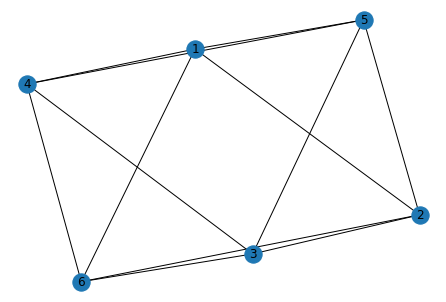

In [7]:
############################
#CALLING THE BETTI FUNCTION#
############################

#Example of a graph
G = nx.Graph()
G.add_edges_from([ (1, 4), (1, 2), (2, 3), (3, 4),(5,4),(5,3),(5,2),(5,1)])
G.add_edges_from([(6, 4), (6, 3), (6, 2), (6, 1)])
nx.draw(G,with_labels = True)

k_in=1 # Put the Betti number you want to compute
#Call the function!
B=Betti_k(G,k_in,verbose=True) #with verbose= True you can see all the steps of the algorithm

In [ ]:
######################
# Here some functions where we create some graphs as examples. 
#To call the function you should just insert the desired Betti number you want to compute for that network.
# E.g. Betti_1 = test_1(1) this will give the number of Betti-1 in the graph inside the function test_1

def test0(K_in):
    #Graph with 2 connected components(B_0)
    G = nx.Graph()
    G.add_edges_from([ (1, 4), (1, 2), (2, 3), (3, 4),(5,4),(5,3),(5,2),(5,1)])
    G.add_edges_from([ (6, 7), (7, 8), (8, 9), (7, 9)])
    nx.draw(G,with_labels = True) 
    
    B=Betti_k(G,K_in,verbose=True)
    
def test1(K_in):
    #Graph with 2d holes(B_1=1)
    G = nx.Graph()
    G.add_edges_from([ (1, 2), (1, 3),(8,9),(7,9),(8,7),(1,8)])
    G.add_edges_from([(4, 5), (5, 6), (6, 7), (7, 4),(4,3)])
    G.add_edges_from([(10, 11),(13,11),(13,10)])
    nx.add_star(G,[8,10,11,12,13])
    nx.draw(G,with_labels = True)
    
    B=Betti_k(G,K_in,verbose=True)
    

def test2(K_in):
    #Graph with  1 3d holes(B_2=1)
    G = nx.Graph()
    G.add_edges_from([ (1, 4), (2, 4), (2, 3), (1, 3)])
    G.add_edges_from([(5, 1), (5, 2), (5, 3), (5, 4)])
    G.add_edges_from([(6, 1), (6, 2), (6, 3), (6, 4)])
    G.add_edges_from([(6, 7), (6, 8), (6, 9), (6, 10)])
    nx.draw(G,with_labels = True)
   
    B=Betti_k(G,K_in,verbose=False)
    
def test3(K_in):
    #Graph with 1 hole in 4 dimension (B_3=1)
    G1 = nx.Graph()
    G1.add_edges_from([(0,1),(1,2),(2,3),(3,0),(4,0),(4,1),(4,2),(4,3),(5,0),(5,1),(5,2),(5,3)])
    G1.add_edges_from([(0,11),(1,11),(2,11),(3,11),(4,11),(5,11),(0,12),(1,12),(2,12),(3,12),(4,12),(5,12)])
    nx.draw(G1,with_labels = True)
    
    B=Betti_k(G1,K_in, verbose=False)
    
def test_matrix(K_in):
    #I compute the network from a Cx matrix and then I compute the betti numbers
    A= np.array(np.loadtxt('Cx_matrix_var01/cx_i=002_n=000.txt'))
    A_thresh=np.matrix(1*(np.copy(A)<=1))
    #print(A_thresh)
    G = nx.from_numpy_matrix(np.matrix(A_thresh))
    #nx.draw(G,with_labels = True)
    
    B=Betti_k(G,K_in, verbose=False)
    E=euler(G,verbose=False)
    print(E)


def random_graph(nodes,prob): #Erdős-Rényi random graph where we have prob of creating an edge
    Random_G=nx.binomial_graph(nodes,prob)
    return Random_G

def test_random(K_in):
    G=random_graph(10,0.8)
    nx.draw(G,with_labels = True)
    B=Betti_k(G,K_in, verbose=False)
    
#Here I can test the networks
start_time = time.time()

test0(0)
#test1(1)
#test2(2)
#test3(3)
#test_matrix()
#test_random(3)
print("The program last %s seconds " % (time.time() - start_time))    

In [ ]:
####################################
#THERE ARE TWO METHODS TO THRESHOLD A NETWORK when you have the connectivity matrix Cx: 
#METHOD 1. USING DIRECTY A VALUE OF a desired FILTRATION OR  
#METHOD 2. CHOOSE THE DENSITY OF CONNECTION YOU WANT TO CONSIDER. 
#WE WILL ILLUSTRATE BOTH METHODS
#WE will lastly illustrate 1 application of method 1 and 2 application of method 2)
#######################################

###############
# METHOD 1 
###############
def filtr_thresh(Set,filtr,i,verbose=False):
    """#Function to create a network based on a given filtration value

    Parameters
    ----------
    Argument1: "Set" contains the connectivity matrices of different individuals. Set is an array conatining all the arrays (one matrix for each individual)
        
    Returns
    -------
    out: G--> the network obained thresholding the matrix for the given value of the threshold
        filtr--> the threshold used to create the network (it returns the input you gave calling the function)

    """    
    def DIAGNOSTIC(*params): # If verbose is True it will print all the DIAGNOSTIC
        if verbose: 
            print(*params)
            
    DIAGNOSTIC("Filtration chosen: %s. I will create a network where I keep just the connections with value smaller than %s "%(str(filtr).zfill(3),str(filtr).zfill(3)))

    C_thresh=np.matrix(1*(np.copy(Set[i])<filtr)) #I create a matrix where 1 if value<thresh otherwise 0
    #DIAGNOSTIC(C_thresh)
    G = nx.from_numpy_matrix(np.matrix(C_thresh)) #I create the network from the matrix 
 
    return G, filtr

In [ ]:
################################
#APPLICATION OF METHOD 1
# Use the function filtr_thresh 
################################

########
#Code to create a big object with all the Cx matices
txt_files_cx = glob.glob('Cx_matrix_var01/cx*_n=000.txt') #opening 10 Cx matrices, 1 for each type of the 10 types of simulated networks (first experiment n=000 for each) 
                                                        #The matrices are in the folder "Cx_matrix". Here you should insert the folder of matrices you want to analyse
print(txt_files_cx) 
Cx_list = [] #Object that will contain all the Cx matrices

for i in range(0,len(txt_files_cx)): #Reading the data in the files and create an object which contains every matrix
    file_i= txt_files_cx[i]
    Cx_list.append(np.array(np.loadtxt(file_i)))   #Add the matrix of a file to the object Cx_list
Cx=np.array(Cx_list) 
########

############
#CALLING THE FUNCTION JUST FOR THE PATIENT NUMBER 3, USING filtrarion value=0.3
G1,filtr= filtr_thresh(Cx,0.1,3,verbose=False)
nx.draw(G1,with_labels = True)
B=Betti_k(G1,1, verbose=False) # I compute Betti-1 for this network
print("Betti 1 is:",B)
#############

#############
# CALLING THE FUNCTION MANY TIMES FOR DIFFERENT PATIENTS AND DIFFERENT VALUES OF FILTRATION
#IMPORTANT: You need to create an empty folder "betti_greater" to run the following code
############
start_time = time.time()
for i in range(0,10): #One file for each Cx(C1,C2..)
    f=open('betti_greater/betti_0_fil_C%i.txt'%(i+1),"w+")#I create one file for each betti_0 (one for each Cx) 
    #f=open('betti_greater/eul_C%i.txt'%(i+1),"w+")
    
    print("Creation of the networks of C_%i"%(i+1))

    #fitration chosen (it is a list)
    filtr00=list(np.arange(0, 0.1, 0.005))
    filtr0=list(np.arange(0.1, 0.2, 0.003))
    filtr1=list(np.arange(0.2, 0.25, 0.01)) # WHEN the filtration is greater we have more connections and the program is slower. 
                                            #We choose to filtration more distanced so the program doen't need too much time
    filtration=filtr00+filtr0+filtr1
    
    for fi in filtration:
        print("Creation of a new network based on the filtration %s chosen"%str(fi).zfill(3))
        G1,filtr=filtr_thresh(Cx,fi,i,verbose=False) #I call the function to create the different networks
        #E=euler1(G1,verbose=False) # compute the Euler characteristic of the obtained network G1
        #f.write('%f %f \n'%(filtr,E)) #write in a file
        k_in=0 #I want betti_0
        B=Betti_k(G1,k_in, verbose=False) #I call the betti function to compute Betti_0 for that matrix
        f.write('%f %f \n'%(filtr,B)) #I write betti and filtration value in a file 

    f.close()    
print("The program last %s seconds " % (time.time() - start_time))

In [ ]:
##################

#METHOD 2
#CHOOSE THE DENSITY OF CONNECTION YOU WANT TO CONSIDER. e.g 10% stronger connections

##################

def dens_thresh(Set,den,i,verbose=False):#set contains the networks of different individuals Cx_list, d is the density, i is the individual
    """#Function to create a network based on a given density

    Parameters
    ----------
    Argument1: "Set" contains the connectivity matrices of different individuals. Set is an array conatining all the arrays (one matrix for each individual)
    Argument2: "den" value of density you want to consider
    Argument3: "i" index of the matrix you want to analyse (i.e. index of the patient)
    
    Returns
    -------
    out: G--> the network obained thresholding the matrix for the given value of the density
        threshold--> the threshold correspondant to the desired density used to create the network 

    """    
    
    def DIAGNOSTIC(*params): # If verbose is True it will print all the DIAGNOSTIC
        if verbose: 
            print(*params)
            
    DIAGNOSTIC("Density choosen: %s. I will create a network where I keep just %s perc of the connections"%(str(den).zfill(3),str(den*100).zfill(3)))
    
    all_links_list=sorted(list((Set[i]).ravel()),reverse=True) #create a list with all the strenght of connection in decreasing order
    
    DIAGNOSTIC("all_links_list:",all_links_list)
    DIAGNOSTIC("All_link_lists has len:",len(all_links_list))
    
    
    size=len(Set[0]) # HERE I HAVE THE NUMBER OF NODES I HAVE IN THE NETWORK !!
    cutoff=int(np.ceil(den*size*(size-1))) #np.ceil return float type upper which is the closest, I convert in integer
    DIAGNOSTIC("I want a percentage of %s of total links so cutoff d*N(N-1)/2:"%str(den).zfill(3),cutoff)
    
    threshold=all_links_list[-(cutoff+size)] # I look for the value correspondent to the index "cutoff" (I count in the list from the end and I ignore the first 75 values beacuse they are all 0)

    DIAGNOSTIC("The threshold is:",threshold)
    if verbose:
        newlist_links = [link for link in all_links_list if link > threshold] #List of the wanted percentage of total connections
        #print("newlist_links:",newlist_links)
        print("len(newlist_links):",len(newlist_links))

    C_thresh=np.matrix(1*(np.copy(Set[i])<threshold)) #I create a matrix where 1 if value>thresh otherwise 0 # !!!!BE CAREFUL!!!: in my matrix greater value means less connected! If for you is different change this line
    #DIAGNOSTIC(C_thresh)
    G = nx.from_numpy_matrix(np.matrix(C_thresh)) #I create the network from the matrix 
    #DIAGNOSTIC("G Number of nodes: {}, edges: {}".format(G.number_of_nodes(), G.number_of_edges())) 

    return G,threshold

In [ ]:
###################

#APPLICATION OF METHOD 2
#1st application
#CHOOSE THE DENSITY OF CONNECTION YOU WANT TO CONSIDER. e.g 10% stronger connections on a given connectivity matrix

#####################


########
#Code to create a big object with all the Cx matices
txt_files_cx = glob.glob('Cx_matrix_var01/cx*_n=000.txt') #opening all the Cx of the 10 types (first experiment n=000 for each) which are in the folder "Cx_matrix"
print(txt_files_cx)
Cx_list = [] #Object that will contain all the Cx matrices

for i in range(0,len(txt_files_cx)): #Reading the data in the files and create an object which contains every matrix
    file_i= txt_files_cx[i]
    Cx_list.append(np.array(np.loadtxt(file_i)))   #Add the matrix of a file to the object Cx_list

Cx=np.array(Cx_list) 
#########


##########
#CALLING THE FUNCTION FOR THE PATIENT NUMBER 3, density=0.1
G_fi,filtr_value= dens_thresh(Cx,0.1,3,verbose=False)
#nx.draw(G_fi,with_labels = True)
B=Betti_k(G_fi,1, verbose=False) #I compute the Betti 1 of this network
print("Betti 1 is:",B)
#########

#########
# CALLING THE FUNCTION MANY TIMES FOR DIFFERENT PATIENTS AND DIFFERENT VALUES OF DENSITY
########
#IMPORTANT: You need to create an empty folder "betti_greater" to run the following code

start_time = time.time()
for i in range(0,10):
    f=open('betti_greater/betti_0_den_C%i.txt'%(i+1),"w+")#I create one file for each betti_0 (one for each Cx) 
    
    #I choose the density I want (is a list)
    density00=[0.002,0.003,0.004,0.005,0.006,0.007,0.008]
    density0=list(np.arange(0.01, 0.09, 0.003))
    density1=list(np.arange(0.1, 0.6, 0.05))
    density=density00+density0+density1
    
    for d in density:
        print("Creation of a new network based on the density %s chosen"%str(d).zfill(3))
        G1,filtr=dens_thresh(Cx,d,i,verbose=False) #I call the function to create the different networks
        k_in=0 #I want betti_0
        B=Betti_k(G1,k_in, verbose=False) #I call the betti function to compute Betti_0 for that matrix
        f.write('%f %f \n'%(filtr,B)) #I write betti and filtration value in a file 

    f.close()    
print("The program last %s seconds " % (time.time() - start_time))

In [ ]:
####################
#DATA VISUALISATION 
####################

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sio
import glob
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
txt_betti_e1_1 = glob.glob('betti_greater/betti_0_den*.txt') #INSERT HERE THE FILE YOU WANT TO PLOT

#Code to visualize the Barcode: merging of connencting components with the increment of the filtration value
fig=plt.figure(figsize=(15, 10)) # I create the figure
filtr_value=[] # list which contain all the lists of filtration values
betti_n=[] #list which contain all the lists of connected components

# #If you want to plot several Betti numbers in the same plot uncomment this
# filtr_value2=[]
# betti_n2=[]
# txt_betti_e2_1=glob.glob('betti_greater/betti_1_den*.txt')

colors=['darkred','red', 'darkorange','gold', 'lawngreen','green', 'limegreen','turquoise','steelblue','darkblue'] #colors
labels = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'] #labels

for i in range(0,10): #For all the 10 files of beta I have 
        
        betti_data  = pd.read_csv(txt_betti_e1_1[i], delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
        filtr_value.append(np.array(betti_data['x'])) # Create an array containing the values of x in the file and append it to filt_value list
        betti_n.append(np.array(betti_data['y'])) # Create an array containing the values of y in the file and append it to betti_n list
        
        #plt.plot(filtr_value[i],betti_n[i], marker='.', c='darkgreen') # If you plot several betti in the same plot use this 
        plt.plot(filtr_value[i],betti_n[i], marker='.',label=labels[i], c=colors[i],alpha=0.8) # I plot the two arrays 


# #IF YOU WANT TO PLOT ANOTHER BETTI IN THE SAME PLOT UNCOMMENT THIS (and change the range in for loop as desired)
#         betti_data2  = pd.read_csv(txt_betti_e2_1[i], delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
#         filtr_value2.append(np.array(betti_data2['x'])) # Create an array containing the values of x in the file and append it to filt_value list
#         betti_n2.append(np.array(betti_data2['y'])) # Create an array containing the values of y in the file and append it to betti_n list
#         #print(filtr_value[i])
#         #print(betti_n[i])
        
#         plt.plot(filtr_value2[i],betti_n2[i], marker='.', c='darkorange',alpha=0.6) # I plot the two arrays
        
    
#         green_patch = mpatches.Patch(color='darkgreen', label='betti_0')
#         orange_patch = mpatches.Patch(color='darkorange', label='betti_1')
#         plt.legend(handles=[green_patch, orange_patch],fontsize=18)
        
        plt.title("Betti_0: #connected components vs density",fontsize=25)
        plt.xlabel("density",fontsize=25)
        plt.ylabel("# connected components",fontsize=25)
        plt.xlim(-0.04, 0.6)
        plt.tick_params(axis='both', labelsize=25)
#         plt.legend(fontsize=25)

#fig.savefig('betti_greater/Betti_0_C1-C10_den.png') #Save figure
plt.show()

In [ ]:
#####################

#2nd APPLICATION OF METHOD 2:
#EXAMPLE OF INCREASING THE DENSITY AND USING THE FUNCTION dens_thresh FOR A GRAPH WITH 25 NODES (the connectivity matrix is not given, we create the connectivity matrix by ourselfs)
#WE CAN COMPUTE THE BETTI NUMBERS AND THE EULER FOR EACH DENSITY

#######################

#IMPORTANT: You need to create an empty folder "betti_greater" to run the following code
start_time = time.time()
f0=open('betti_greater/betti_0_random_den.txt',"w+")#I create one file betti_0 
f1=open('betti_greater/betti_1_random_den.txt',"w+")#I create one file betti_1 
# f2=open('betti_greater/betti_2_random_den.txt',"w+")#I create one file betti_2 
#f3=open('betti_greater/betti_3_random_den.txt',"w+")#I create one file betti_3  
#f4=open('betti_greater/euler_random_den.txt',"w+")#I create one file euler 

#I choose the density I want to use
density00=[0.002,0.003,0.004,0.005,0.006,0.007,0.008]
density0=list(np.arange(0.01, 0.09, 0.001))
density1=list(np.arange(0.1, 0.9, 0.004))
density=density00+density0+density1


G_full=random_graph(25,1) #GRAPH WITH 25 CONNECTED NODES WE WILL USE for this example
#nx.draw(G1,with_labels = True) # if you want to visualize it
for (u, v) in G_full.edges():
    G_full.edges[u,v]['weight'] = np.random.uniform(0.1,0.8) # I create a weigted graph (as is the case of connectivity matrix)
A = [np.array(nx.to_numpy_matrix(G_full))] # I convert into an array
#print(A) #matrix we are considering 

for d in density:
    print("Creation of a new network based on the density %s chosen"%str(d).zfill(3))
    G1,filtr=dens_thresh(A,d,0,verbose=False) #I call the function to create the different networks
    B0=Betti_k(G1,0, verbose=False)
    f0.write('%f %f \n'%(filtr,B0)) #I write betti and filtration value in a file 
    B1=Betti_k(G1,1, verbose=False)
    f1.write('%f %f \n'%(filtr,B1)) #I write betti and filtration value in a file 
#     B2=Betti_k(G1,2, verbose=False)
#     f2.write('%f %f \n'%(filtr,B2)) #I write betti and filtration value in a file 
#     B3=Betti_k(G1,3, verbose=False)
#     f3.write('%f %f \n'%(filtr,B3)) #I write betti and filtration value in a file 
#     E=euler(G1,verbose=False)
#     e1=np.log(E)
#     f4.write('%f %f \n'%(filtr,E)) #I write betti and filtration value in a file 
    
f0.close() 
f1.close() 
# f2.close() 
# f3.close() 
#f4.close() 
print("The program last %s seconds " % (time.time() - start_time))

In [ ]:
##################### 
# DATA VISUALISATION 
#of the 2nd application of method 2: INCREASING THE DENSITY AND USING THE FUNCTION dens_thresh FOR A GRAPH WITH 25 NODES
#################

#Import the data I want to plot
txt_betti_0 = glob.glob('betti_greater/betti_0_random_den*.txt') #INSERT HERE THE FILE YOU WANT TO PLOT
txt_betti_1 = glob.glob('betti_greater/betti_1_random_den*.txt')

#Code to visualize the Barcode: merging of connencting components with the increment of the filtration value
fig=plt.figure(figsize=(15, 10)) # I create the figure

filtr_value=[] # list which contain all the lists of filtration values for Betti0
betti_n=[] #list which contain all the lists of connected components

betti_data  = pd.read_csv(txt_betti_0[i], delim_whitespace=True, names= ['x','y']) #I upload the data where I have a list for the onnected components and the correspondant filtration values
filtr_value.append(np.array(betti_data['x'])) # Create an array containing the values of x in the file and append it to filt_value list
betti_n.append(np.array(betti_data['y'])) # Create an array containing the values of y in the file and append it to betti_n list

plt.plot(filtr_value[i],betti_n[i], marker='.', c='darkgreen') # If you plot several betti in the same plot use this 

# #IF YOU WANT TO PLOT ANOTHER BETTI IN THE SAME PLOT use this
filtr_value1=[]
betti_n1=[] #list which contain all the lists of 2D holes (Betti-1)

betti_data1  = pd.read_csv(txt_betti_1[i], delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
filtr_value1.append(np.array(betti_data1['x'])) # Create an array containing the values of x in the file and append it to filt_value list
betti_n1.append(np.array(betti_data1['y'])) # Create an array containing the values of y in the file and append it to betti_n list
plt.plot(filtr_value1[i],betti_n1[i], marker='.', c='darkorange',alpha=0.6) # I plot the two arrays

green_patch = mpatches.Patch(color='darkgreen', label='betti_0')
orange_patch = mpatches.Patch(color='darkorange', label='betti_1')
plt.legend(handles=[green_patch, orange_patch],fontsize=18)

plt.title("Betti_0 /Betti_1",fontsize=25)
plt.xlabel("density",fontsize=25)
plt.ylabel("# connected components/ # 2D holes",fontsize=25)
plt.tick_params(axis='both', labelsize=25)


#fig.savefig('betti_greater/Betti_0_1_den.png') #Save figure
plt.show()

In [ ]:
##########################################
# EXAMPLE OF COMPUTATIONS OF BETTI NUMBERS AND EULER USING RANDOM NETWORK with increasing probability,
#for each probability of the random network we compute the Betti numbers and the Euler Characteristics
#########################################
#IMPORTANT: To run the following code you need to create an empty folder "random". 

start_time = time.time()
#RANDOM GRAPH 10 times WITH PROBABILITY 
for i in range(0,10):
    f0=open('random/betti_0_random_%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)
    f1=open('random/betti_1_random_%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)
    f2=open('random/betti_2_random%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)
    f3=open('random/betti_3_random%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)
    f4=open('random/1euler_random%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)

    prob=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8]
#     prob0=list(np.arange(0, 0.1, 0.005))
#     prob1=list(np.arange(0.1, 0.6, 0.005))
#     prob2=[0.6,0.63,0.65,0.7,0.75,0.8]
#     prob=prob0+prob1+prob2 # If you want a more precise plot uncomment this

    for p in prob:
        print("Creation of a new network based on the prob %s chosen"%str(p).zfill(3))
        G1=random_graph(25,p)
        #nx.draw(G,with_labels = True)
        B0=Betti_k(G1,0, verbose=False)
        f0.write('%f %f \n'%(p,B0)) #I write betti and filtration value in a file 
        B1=Betti_k(G1,1, verbose=False)
        f1.write('%f %f \n'%(p,B1)) #I write betti and filtration value in a file 
        B2=Betti_k(G1,2, verbose=False)
        f2.write('%f %f \n'%(p,B2)) #I write betti and filtration value in a file 
        B3=Betti_k(G1,3, verbose=False)
        f3.write('%f %f \n'%(p,B3)) #I write betti and filtration value in a file 
        E=euler(G1,verbose=False)
        f4.write('%f %f \n'%(p,E)) #I write betti and filtration value in a file 

    f0.close() 
    f1.close() 
    f2.close() 
    f3.close() 
    f4.close() 
print("The program runs in %s seconds " % (time.time() - start_time))

In [ ]:
######### 
#DATA VISUALISATION 
############

#Import the data I want to plot
txt_betti_0 = glob.glob('random/betti_0_random*.txt')
txt_betti_1 = glob.glob('random/betti_1_random*.txt')
txt_betti_2 = glob.glob('random/betti_2_random*.txt')
txt_betti_3 = glob.glob('random/betti_3_random*.txt')
txt_euler = glob.glob('random/1euler*.txt')

# print(len(txt_betti_0))
# print(len(txt_betti_1))
# print(len(txt_betti_2))
# print(len(txt_betti_3))

###############
#Code to visualize the Barcode: merging of connencting components with the increment of the probability
import matplotlib.patches as mpatches
fig=plt.figure(figsize=(15, 10)) # I create the figure

prob_value=[] # list which contain all the probabilities
betti_n=[] #list which contain all the lists of connected components

prob_value1=[] #IS THE PROBABILITY 
betti_n1=[]

prob_value2=[]
betti_n2=[]


prob_value3=[]
betti_n3=[]


prob_value4=[]
euler=[] 


#IF I WANT TO DO DOUBLE AXIS
# fig, ax1 = plt.subplots(figsize=(15,10))
# color='tab:red'
# ax1.set_xlabel("prob",fontsize=15)
# ax1.set_ylabel("# of k-D holes",fontsize=15,color =color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.tick_params(direction='out', length=6, width=1, colors=color,
#                grid_color=color, grid_alpha=0.5)

# ax2.set_ylabel('log(Euler)', color=color)  # we already handled the x-label with ax1

fig=plt.figure(figsize=(15, 10)) 

for i in range(0,10): #For all the 10 files of beta_zero I have 
        
        betti_data  = pd.read_csv(txt_betti_0[i], delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
        betti_n.append(np.array(betti_data['y'])) # Create an array containing the values of y in the file and append it to betti_n list 
        prob_value.append(np.array(betti_data['x']))
        #ax1.plot(prob_value[0],betti_n[i], marker='.', c='darkred') # I plot the two arrays 
        plt.plot(prob_value[0],betti_n[i], marker='.', c='darkred') # I plot the two arrays


        betti_data1  = pd.read_csv(txt_betti_1[i], delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
        prob_value1.append(np.array(betti_data1['x'])) # Create an array containing the values of x in the file and append it to filt_value list
        betti_n1.append(np.array(betti_data1['y'])) # Create an array containing the values of y in the file and append it to betti_n list
        #ax1.plot(prob_value1[0],betti_n1[i], marker='.', c='green') # I plot the two arrays
        plt.plot(prob_value1[0],betti_n1[i], marker='.', c='green') # I plot the two arrays
        
        
        betti_data2  = pd.read_csv(txt_betti_2[i], delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
        prob_value2.append(np.array(betti_data2['x'])) # Create an array containing the values of x in the file and append it to filt_value list
        betti_n2.append(np.array(betti_data2['y'])) # Create an array containing the values of y in the file and append it to betti_n list
        #ax1.plot(prob_value2[0],betti_n2[i], marker='.', c='darkblue') # I plot the two arrays
        plt.plot(prob_value2[0],betti_n2[i], marker='.', c='darkblue') # I plot the two arrays
        
        
        
        betti_data3  = pd.read_csv(txt_betti_3[i], delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
        prob_value3.append(np.array(betti_data3['x'])) # Create an array containing the values of x in the file and append it to filt_value list
        betti_n3.append(np.array(betti_data3['y'])) # Create an array containing the values of y in the file and append it to betti_n list
        #ax1.plot(prob_value3[0],betti_n3[i], marker='.', c='gold') # I plot the two arrays
        plt.plot(prob_value3[0],betti_n3[i], marker='.', c='gold') # I plot the two arrays
        
        
        euler_data4  = pd.read_csv(txt_euler[i], delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
        prob_value4.append(np.array(euler_data4['x'])) # Create an array containing the values of x in the file and append it to filt_value list
        euler.append(np.array(euler_data4['y'])) # Create an array containing the values of y in the file and append it to betti_n list
        #ax2.plot(prob_value4[0],np.log(abs(euler_n4[i])), marker='.', c='turquoise') # I plot the two arrays
        plt.plot(prob_value4[0],np.log(abs(euler[i])+1), marker='.', c='turquoise') # I plot the two arrays

        fig.tight_layout()
    
        red_patch = mpatches.Patch(color='darkred', label='B0')
        green_patch = mpatches.Patch(color='green', label='B1')
        blue_patch = mpatches.Patch(color='darkblue', label='B2')
        gold_patch = mpatches.Patch(color='gold', label='B3')
        tur_patch = mpatches.Patch(color='turquoise', label='Log(abs(Euler))')
        plt.legend(handles=[red_patch,green_patch, blue_patch,gold_patch,tur_patch],fontsize=18)
        
        plt.title("Betti numbers: number of k-D holes vs prob",fontsize=18)
        plt.xlabel("prob",fontsize=15)
        plt.ylabel("# of k-D holes",fontsize=15)
                
#fig.savefig('random/Bettik_10_random_prob_logABS_EU.png') #Save figure
plt.show()


#################################################
#Code to compute the mean of all the filtration values arrays and errors and plot it

#print(len(betti_n)) #just to check it isthe right number
arrays_0 = [np.array(x) for x in betti_n] # I transform each list contained in betti_n in a np.array I had a list of lists now I have a list of arrays
#print(len(arrays_0))

mean_arrays_0=[np.mean(k) for k in zip(*arrays_0)] #I create a list which contain the means of all the values in the different ASD arrays
#print(len(mean_arrays_0)) #just to check 
#print(mean_arrays_0)
var_0=[np.sqrt(np.var(k)/len(betti_n)) for k in zip(*arrays_0)] #I create a list which contain the variance of all the values for each position in the list
#print(var_0)


#print(len(betti_n1)) 
arrays_1 = [np.array(x) for x in betti_n1]
mean_arrays_1=[np.mean(k) for k in zip(*arrays_1)]
#print(len(mean_arrays_1)) 
var_1=[np.sqrt(np.var(k)/len(betti_n1)) for k in zip(*arrays_1)]
#print(var_1)

#print(len(betti_n2)) 
arrays_2 = [np.array(x) for x in betti_n2]
mean_arrays_2=[np.mean(k) for k in zip(*arrays_2)]
#print(len(mean_arrays_2)) 
var_2=[np.sqrt(np.var(k)/len(betti_n2)) for k in zip(*arrays_2)]

#print(len(betti_n3)) 
arrays_3 = [np.array(x) for x in betti_n3]
mean_arrays_3=[np.mean(k) for k in zip(*arrays_3)]
#print(len(mean_arrays_3)) 
var_3=[np.sqrt(np.var(k)/len(betti_n3)) for k in zip(*arrays_3)]

arrays_4 = [np.log(abs(np.array(x))+1) for x in betti_n4]
mean_arrays_4=[np.mean(k) for k in zip(*arrays_4)]
#print(len(mean_arrays_4)) 
var_4=[np.sqrt(np.var(k)/len(betti_n4)) for k in zip(*arrays_4)]



fig=plt.figure(figsize=(15, 10))#create the figure

#IF I WANT TO DO DOUBLE AXIS
# fig, ax1 = plt.subplots(figsize=(15,10))
# color = 'tab:red'
# ax1.set_xlabel("prob",fontsize=15)
# ax1.set_ylabel("# of k-D holes",fontsize=15,color =color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.tick_params(direction='out', length=6, width=1, colors=color,
#                grid_color=color, grid_alpha=0.5)

# ax2.set_ylabel('log(Euler)', color=color) 

#I plot the mean and the error of the groups
#IF I WANT DOUBLE AXES
# ax1.errorbar(prob_value[0],mean_arrays_0, yerr=var_0, marker='.', c='darkred', label= 'B0')
# ax1.errorbar(prob_value1[0],mean_arrays_1, yerr=var_1, marker='.', c='green',label= 'B1')
# ax1.errorbar(prob_value2[0],mean_arrays_2, yerr=var_2, marker='.', c='darkblue', label= 'B2')
# ax1.errorbar(prob_value3[0],mean_arrays_3, yerr=var_3, marker='.', c='gold',label= 'B3')
# ax2.errorbar(prob_value4[0],mean_arrays_4, yerr=var_4, marker='.', c='turquoise',label= 'log(Euler)')
# ax1.legend(fontsize=18)
# ax2.legend(fontsize=18, loc='center right')


plt.errorbar(prob_value[0],mean_arrays_0, yerr=var_0, marker='.', c='darkred', label= 'B0')
plt.errorbar(prob_value1[0],mean_arrays_1, yerr=var_1, marker='.', c='green',label= 'B1')
plt.errorbar(prob_value2[0],mean_arrays_2, yerr=var_2, marker='.', c='darkblue', label= 'B2')
plt.errorbar(prob_value3[0],mean_arrays_3, yerr=var_3, marker='.', c='gold',label= 'B3')
plt.errorbar(prob_value4[0],mean_arrays_4, yerr=var_4, marker='.', c='turquoise',label= 'Log(abs(Euler))')


plt.title("Betti numbers: number of k-D holes vs prob (mean)",fontsize=18)
plt.xlabel("prob",fontsize=15)
plt.ylabel("# of k-D holes",fontsize=15)
plt.legend(fontsize=18)

plt.show()
#fig.savefig('betti_greater/random/1Betti_10_random_prob_mean_sqvarRADn_logABS_EU.png')
